In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('tankaiki_housing.csv')
df.head(3)

,x,y
0,40.362,137500.0
1,40.686,132500.0
2,38.430,93000.0


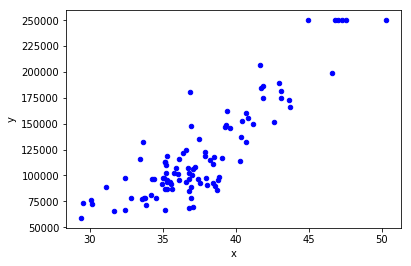

In [3]:
df.plot(kind='scatter', x='x', y='y', color='blue' )

In [4]:
# 単純な線形回帰モデル用関数
def simple_liner_model(w,b):
    test_data_calcu = lambda w, b: lambda x :  w * x + b
    return test_data_calcu(w, b)

In [5]:
df_x = pd.DataFrame(index=df.index, columns=[])
df_x['b'] = 1
df_x['x'] = df['x']

In [6]:
df_calc1 = pd.DataFrame(index=df.index, columns=[])
df_calc1['xy'] = df['x'] * df['y']
df_calc1['x2'] = df['x'] * df['x']
df_calc1.head(3)

,xy,x2
0,5549775.0,1629.091044
1,5390895.0,1655.350596
2,3573990.0,1476.864900


In [7]:
print('sum xy :' + str(df_calc1['xy'].sum()))
print('sum x2 :' + str(df_calc1['x2'].sum()))
w=df_calc1['xy'].sum() / df_calc1['x2'].sum()
ans1_model = np.array([0, w])
ans1_model

sum xy :472128540.0
sum x2 :143197.24014000004


array([   0.        , 3297.05055445])

In [8]:
df_ans1 = pd.DataFrame(index=df.index, columns=[])
df_ans1['y'] = np.dot(df_x, ans1_model.T)
df_ans1['signed_error']  = df ['y'] - df_ans1['y']
df_ans1['squered_error'] = df_ans1['signed_error'] * df_ans1['signed_error']
df_ans1.head(3)

,y,signed_error,squered_error
0,133075.554479,4424.445521,1.957572e+07
1,134143.798859,-1643.798859,2.702075e+06
2,126705.652808,-33705.652808,1.136071e+09


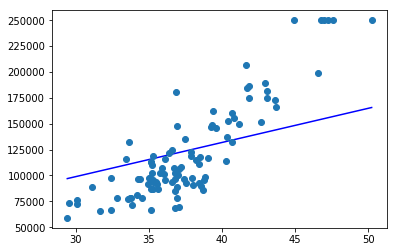

sum signed error :-2977.3613108246063
mean squered error :1293550854.1901245


In [9]:
line1 = simple_liner_model(ans1_model[1], ans1_model[0])
# 図示してみる
x = np.linspace(df['x'].min(),df['x'].max())  
plt.plot(x,list(map(line1, x)),"b-") 
plt.plot(df['x'], df['y'], 'o')
plt.show()
print('sum signed error :' + str(df_ans1['signed_error'] .sum() / len(df_ans1)))
print('mean squered error :' + str(df_ans1['squered_error'] .sum() / len(df_ans1)))

In [10]:
df.head(3)

,x,y
0,40.362,137500.0
1,40.686,132500.0
2,38.430,93000.0


In [11]:
ans2_model = np.array([df_ans1['signed_error'] .sum() / len(df_ans1), ans1_model[1]])
ans2_model

array([-2977.36131082,  3297.05055445])

In [12]:
df_ans2 = pd.DataFrame(index=df.index, columns=[])
df_ans2['y'] = np.dot(df_x, ans2_model.T)
df_ans2['signed_error']  = df ['y'] - df_ans2['y']
df_ans2['squered_error'] = df_ans2['signed_error'] * df_ans2['signed_error']
df_ans2.head(3)

,y,signed_error,squered_error
0,130098.193168,7401.806832,5.478674e+07
1,131166.437548,1333.562452,1.778389e+06
2,123728.291497,-30728.291497,9.442279e+08


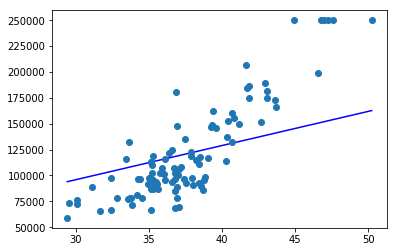

sum signed error :2.3283064365386963e-12
mean squered error :1284686173.81493


In [13]:
line2 = simple_liner_model(ans2_model[1], ans2_model[0])
# 図示してみる
x = np.linspace(df['x'].min(),df['x'].max())  
plt.plot(x,list(map(line2, x)),"b-") 
plt.plot(df['x'], df['y'], 'o')
plt.show()
print('sum signed error :' + str(df_ans2['signed_error'] .sum() / len(df_ans2)))
print('mean squered error :' + str(df_ans2['squered_error'] .sum() / len(df_ans2)))

In [14]:
df2 = pd.DataFrame(index=df.index, columns=[])
df2['x'] = df['x'] - 30
df2['y'] = df['y']
df2.head(3)

,x,y
0,10.362,137500.0
1,10.686,132500.0
2,8.430,93000.0


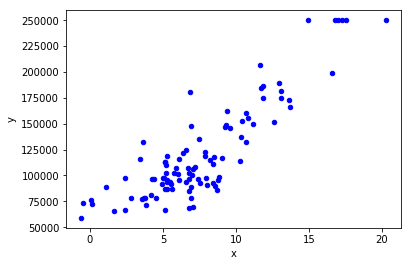

In [15]:
df2.plot(kind='scatter', x='x', y='y', color='blue' )

In [16]:
df2_x = pd.DataFrame(index=df.index, columns=[])
df2_x['b'] = 1
df2_x['x'] = df['x'] - 30

In [17]:
df_calc2 = pd.DataFrame(index=df2.index, columns=[])
df_calc2['xy'] = df2['x'] * df2['y']
df_calc2['x2'] = df2['x'] * df2['x']
df_calc2.head(3)

,xy,x2
0,1424775.0,107.371044
1,1415895.0,114.190596
2,783990.0,71.064900


In [18]:
print('sum xy :' + str(df_calc2['xy'].sum()))
print('sum x2 :' + str(df_calc2['x2'].sum()))
w2=df_calc2['xy'].sum() / df_calc2['x2'].sum()
ans3_model = np.array([0, w2])
ans3_model

sum xy :108933540.00000001
sum x2 :7463.920140000002


array([    0.        , 14594.68187718])

In [19]:
df_ans3 = pd.DataFrame(index=df.index, columns=[])
df_ans3['y'] = np.dot(df2_x, ans3_model.T)
df_ans3['signed_error']  = df2 ['y'] - df_ans3['y']
df_ans3['squered_error'] = df_ans3['signed_error'] * df_ans3['signed_error']
df_ans3.head(3)

,y,signed_error,squered_error
0,151230.093611,-13730.093611,1.885155e+08
1,155958.770540,-23458.770540,5.503139e+08
2,123033.168225,-30033.168225,9.019912e+08


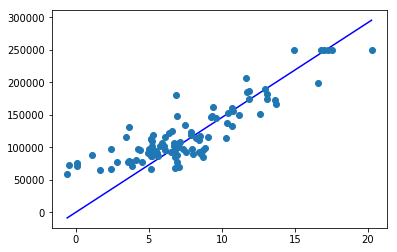

sum signed error :9821.123902097377
mean squered error :961363879.4459894


In [20]:
line3 = simple_liner_model(ans3_model[1], ans3_model[0])
# 図示してみる
x = np.linspace(df2['x'].min(),df2['x'].max())  
plt.plot(x,list(map(line3, x)),"b-") 
plt.plot(df2['x'], df2['y'], 'o')
plt.show()
print('sum signed error :' + str(df_ans3['signed_error'] .sum() / len(df_ans3)))
print('mean squered error :' + str(df_ans3['squered_error'] .sum() / len(df_ans3)))

In [21]:
ans4_model = np.array([ - w2*30, w2])
ans4_model

array([-437840.45631549,   14594.68187718])

In [22]:
df_ans4 = pd.DataFrame(index=df.index, columns=[])
df_ans4['y'] = np.dot(df_x, ans4_model.T)
df_ans4['signed_error']  = df ['y'] - df_ans4['y']
df_ans4['squered_error'] = df_ans4['signed_error'] * df_ans4['signed_error']
df_ans4.head(3)

,y,signed_error,squered_error
0,151230.093611,-13730.093611,1.885155e+08
1,155958.770540,-23458.770540,5.503139e+08
2,123033.168225,-30033.168225,9.019912e+08


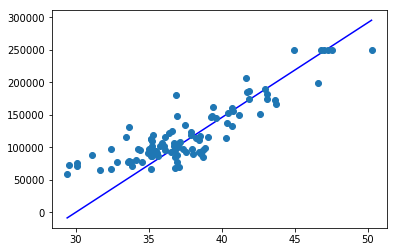

sum signed error :9821.123902097355
mean squered error :961363879.4459889


In [23]:
line4 = simple_liner_model(ans4_model[1], ans4_model[0])
# 図示してみる
x = np.linspace(df['x'].min(),df['x'].max())  
plt.plot(x,list(map(line4, x)),"b-") 
plt.plot(df['x'], df['y'], 'o')
plt.show()
print('sum signed error :' + str(df_ans4['signed_error'] .sum() / len(df_ans4)))
print('mean squered error :' + str(df_ans4['squered_error'] .sum() / len(df_ans4)))

In [24]:
def findBestAns(df, start_i, loop, rate):
    current_error = -1
    models = []
    errors = []
    hori_move = - start_i
    for i in range(loop):
        hori_move = start_i + i * rate
        df_new = pd.DataFrame(index=df.index, columns=[])
        df_new['x'] = df['x'] - hori_move
        df_new['y'] = df['y']
        df_new_x = pd.DataFrame(index=df.index, columns=[])
        df_new_x['b'] = 1
        df_new_x['x'] = df['x'] - hori_move
        df_new_calc = pd.DataFrame(index=df.index, columns=[])
        df_new_calc['xy'] = df_new['x'] * df_new['y']
        df_new_calc['x2'] = df_new['x'] * df_new['x']
        w_new=df_new_calc['xy'].sum() / df_new_calc['x2'].sum()
        ans_new_model = np.array([0, w_new])
        df_new_ans = pd.DataFrame(index=df.index, columns=[])
        df_new_ans['y'] = np.dot(df_new_x, ans_new_model.T)
        df_new_ans['signed_error']  = df_new ['y'] - df_new_ans['y']
        df_new_ans['squered_error'] = df_new_ans['signed_error'] * df_new_ans['signed_error']
        MSE = df_new_ans['squered_error'] .sum() / len(df_new_ans)
        models.append(ans_new_model.copy())
        errors.append(MSE)
        if current_error != -1 and current_error < MSE:
            break
        current_error = MSE
    return hori_move, models, errors

In [25]:
findBestAns(df, 25, 10, 1)

(27,
 [array([   0.        , 9636.34081447]),
  array([    0.        , 10378.75568452]),
  array([    0.        , 11227.50321538])],
 [529542320.8208013, 527905297.11443293, 551577763.5663714])

In [26]:
findBestAns(df, 25.5, 30, 0.01)

(25.61,
 [array([   0.        , 9995.32743394]),
  array([    0.        , 10002.74970106]),
  array([    0.        , 10010.18175596]),
  array([    0.        , 10017.62361493]),
  array([    0.       , 10025.0752943]),
  array([    0.        , 10032.53681039]),
  array([    0.        , 10040.00817956]),
  array([    0.       , 10047.4894182]),
  array([    0.        , 10054.98054272]),
  array([    0.        , 10062.48156955]),
  array([    0.        , 10069.99251516]),
  array([    0.        , 10077.51339603])],
 [526224070.56137174,
  526204965.71419024,
  526187861.60436296,
  526172767.2245152,
  526159691.606006,
  526148643.81910205,
  526139632.9731586,
  526132668.2167991,
  526127758.73809224,
  526124913.7647356,
  526124142.564236,
  526125454.4440943])

In [27]:
findBestAns(df, 25.59, 30, 0.001)

(25.6,
 [array([    0.        , 10062.48156955]),
  array([    0.       , 10063.2322175]),
  array([    0.        , 10063.98296465]),
  array([    0.        , 10064.73381102]),
  array([    0.        , 10065.48475662]),
  array([    0.        , 10066.23580148]),
  array([    0.        , 10066.98694561]),
  array([    0.        , 10067.73818903]),
  array([    0.        , 10068.48953175]),
  array([    0.        , 10069.24097379]),
  array([    0.        , 10069.99251516])],
 [526124913.7647356,
  526124743.17164713,
  526124593.32554436,
  526124464.2357195,
  526124355.9114707,
  526124268.36209947,
  526124201.5969113,
  526124155.62521493,
  526124130.45632493,
  526124126.09955835,
  526124142.564236])

In [28]:
findBestAns(df, 25.598, 30, 0.0001)

(25.5988,
 [array([    0.        , 10068.48953175]),
  array([    0.        , 10068.56467148]),
  array([    0.        , 10068.63981221]),
  array([    0.        , 10068.71495393]),
  array([    0.        , 10068.79009665]),
  array([    0.        , 10068.86524035]),
  array([    0.        , 10068.94038505]),
  array([    0.        , 10069.01553075]),
  array([    0.        , 10069.09067743])],
 [526124130.45632493,
  526124129.0839487,
  526124127.91970336,
  526124126.96359795,
  526124126.2156415,
  526124125.6758435,
  526124125.34421366,
  526124125.22076064,
  526124125.30549425])

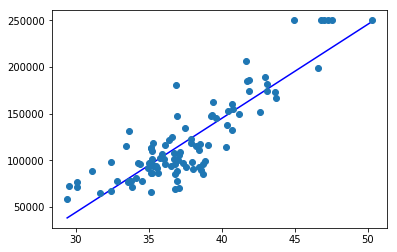

sum signed error :-7.0579251548004684
mean squered error :526124175.03497577


In [29]:
ans5_model = np.array([ - 10069.01553075*25.598, 10069.01553075])
df_ans5 = pd.DataFrame(index=df.index, columns=[])
df_ans5['y'] = np.dot(df_x, ans5_model.T)
df_ans5['signed_error']  = df ['y'] - df_ans5['y']
df_ans5['squered_error'] = df_ans5['signed_error'] * df_ans5['signed_error']

line5 = simple_liner_model(ans5_model[1], ans5_model[0])
# 図示してみる
x = np.linspace(df['x'].min(),df['x'].max())  
plt.plot(x,list(map(line5, x)),"b-") 
plt.plot(df['x'], df['y'], 'o')
plt.show()
print('sum signed error :' + str(df_ans5['signed_error'] .sum() / len(df_ans5)))
print('mean squered error :' + str(df_ans5['squered_error'] .sum() / len(df_ans5)))

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
diabetes_X = np.reshape(df['x'].values, (len(df), 1))
diabetes_y = np.reshape(df['y'].values, (len(df), 1))

In [32]:
diabetes_X[:3]

array([[40.362],
       [40.686],
       [38.43 ]])

In [33]:
diabetes_y[:3]

array([[137500.],
       [132500.],
       [ 93000.]])

In [34]:
regr = linear_model.LinearRegression()

In [35]:
regr.fit(diabetes_X, diabetes_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
diabetes_y_pred = regr.predict(diabetes_X)
diabetes_y_pred[0][:3]

array([148651.90651788])

In [37]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y, diabetes_y_pred))

Coefficients: 
 [[10069.02251928]]
Mean squared error: 526124125.22
Variance score: 0.76


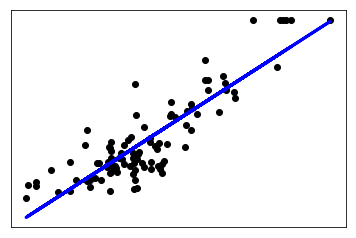

In [38]:
# Plot outputs
plt.scatter(diabetes_X, diabetes_y,  color='black')
plt.plot(diabetes_X, diabetes_y_pred, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())

plt.show()

In [39]:
def gradDesent(learning_rate, df):
    df_ans = pd.DataFrame(index=df.index, columns=[])
    df_x = pd.DataFrame(index=df.index, columns=[])
    df_x['b'] = 1
    df_x['x'] = df['x']
    current_model = np.array([1, 1])
    for i in range (100):
        grad = pd.DataFrame(index=df.index, columns=[])
        grad = (df['y'] - np.dot(df_x, current_model) ) * df_x['x']  / len(grad)
        current_model[1] += grad.sum() * learning_rate
        current_model[0] +=  ((df['y'] - np.dot(df_x, current_model)) / len(df_x)).sum()
        df_ans = pd.DataFrame(index=df.index, columns=[])
        df_ans['y'] = np.dot(df_x, current_model.T)
        df_ans['signed_error']  = df ['y'] - df_ans['y']
        df_ans['squered_error'] = df_ans['signed_error'] * df_ans['signed_error']
    return current_model, df_ans['squered_error'].sum() / len(df_ans)

In [40]:
learning_rate = 0.001
gradAns = gradDesent(learning_rate, df)
print("model:" + str(gradAns[0]))
print("MSE:" + str(gradAns[1]))

model:[-218174    9017]
MSE:544430859.9188848


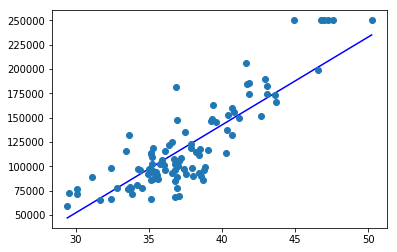

mean squered error :544430859.9188848


In [41]:
line5 = simple_liner_model(gradAns[0][1], gradAns[0][0])
# 図示してみる
x = np.linspace(df['x'].min(),df['x'].max())  
plt.plot(x,list(map(line5, x)),"b-") 
plt.plot(df['x'], df['y'], 'o')
plt.show()
print('mean squered error :' + str(gradAns[1]))